In [75]:
#
# SciPy Teen Track Afternoon Session
# Part 3 (Before Break)
# Emily Quinn Finney
#

# Introduction
"""
We're finally ready to start diving into our data set! We'll start this section
by reading in a text file containing a version of the IMDB data set and getting
to know some of its basic properties (using the data types and manipulation
tools we discussed earlier). Then we'll learn how to plot our data, so that
we can see trends visually. Finally, we'll talk about how to create a function
that will allow you to reproduce an analysis on a different set of data. 
""";

In [76]:
# Reading in the data set and very basic exploratory analysis
"""
We're going to start by reading in our data set and learning how to navigate
a big table of information, using the tools we've already seen.
""";

# importing the relevant data
import csv
imdb = list(csv.DictReader(open('imdb_data.txt'), delimiter=' '))

# importing data with NumPy
import numpy as np
imdb_num = np.loadtxt('imdb_numerical.txt')

imdb[2]['director_name']

'Christopher Nolan'

In [77]:
"""
We can put together our text-based data and our numerical data because
our data are ordered by movie ID. When you encounter a wild database
in the real world, that is not always true.
""";

budget = imdb_num[:,10]
movie_title = [ row['movie_title'] for row in imdb ]

print(movie_title[99], budget[99])

Transformers  150000000.0


In [78]:
for index in range(len(imdb)):
    print(movie_title[index], budget[index])

Avatar  237000000.0
Pirates of the Caribbean: At World's End  300000000.0
The Dark Knight Rises  250000000.0
John Carter  263700000.0
Spider-Man 3  258000000.0
Tangled  260000000.0
Avengers: Age of Ultron  250000000.0
Batman v Superman: Dawn of Justice  250000000.0
Superman Returns  209000000.0
Pirates of the Caribbean: Dead Man's Chest  225000000.0
The Lone Ranger  215000000.0
Man of Steel  225000000.0
The Chronicles of Narnia: Prince Caspian  225000000.0
The Avengers  220000000.0
Pirates of the Caribbean: On Stranger Tides  250000000.0
Men in Black 3  225000000.0
The Amazing Spider-Man  230000000.0
Robin Hood  200000000.0
The Hobbit: The Desolation of Smaug  225000000.0
The Golden Compass  180000000.0
Titanic  200000000.0
Captain America: Civil War  250000000.0
Battleship  209000000.0
Jurassic World  150000000.0
Spider-Man 2  200000000.0
Iron Man 3  200000000.0
Alice in Wonderland  200000000.0
Monsters University  200000000.0
Transformers: Revenge of the Fallen  200000000.0
Transform

In [79]:
# we can find the index of the largest budget movie
# and then go back and find what movie it is
print(np.argmax(budget))
title = movie_title[np.argmax(budget)]
print(title)

1
Pirates of the Caribbean: At World's End 


In [80]:
"""
Exercise: 
We are going to compare the scores of movies made in 2013 and 2014. 

First, use two list comprehensions to make lists of movies made in
2013 and 2014. You should use the numerical data (from imdb_num). 
Remember that the numerical data are stored in a list of lists, and 
the eleventh column stores the year the movie was made.

After you have made your list comprehensions, you should have two
arrays of data - one list with only movies made in 2013 and one list
with only movies made in 2014. Use the np.mean() command to find
the average IMDB score of movies made in each year.
""";

In [81]:
# Plotting/basic intro to matplotlib
"""
Now we've seen how we can find some interesting information about
what's in a data set. But how can we visualize our data? The package
matplotlib helps us take numerical data and turn them into 
beautiful plots.
""";

import matplotlib.pyplot as plt

"""
Here is where we find the documentation for matplotlib. 

And here are some examples: https://matplotlib.org/gallery.html
""";

In [82]:
# scatter plots
"""
Let's start by plotting two variables we might be interested in.
Documentation: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
""";
budget = imdb_num[:,10]
imdb_score = imdb_num[:,13]
print(budget[0], imdb_score[0])

237000000.0 7.9


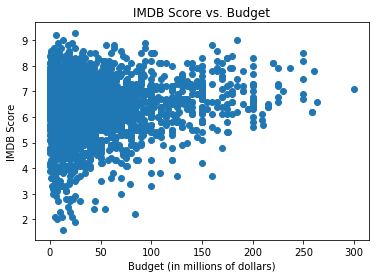

In [83]:
budget_millions = budget/1000000.
plt.scatter(budget_millions, imdb_score)
plt.title("IMDB Score vs. Budget")
plt.xlabel("Budget (in millions of dollars)")
plt.ylabel("IMDB Score")
plt.show()

In [84]:
print(np.mean(imdb_score))

6.38357424442


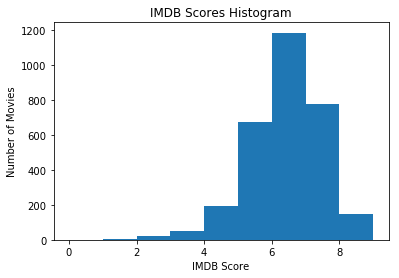

In [85]:
# histograms
""" 
Maybe we're just interested in the distribution of IMDB scores. 
We can create a histogram to see that in detail.
Documentation: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html
""";

plt.clf()
plt.hist(imdb_score, np.arange(0,10,1))
plt.title("IMDB Scores Histogram")
plt.xlabel("IMDB Score")
plt.ylabel("Number of Movies")
plt.show()

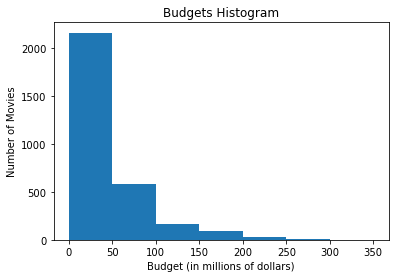

In [86]:
"""
Or we could do the same thing to understand the distribution of 
budgets.
""";
plt.clf()
plt.hist(budget_millions, np.arange(0, 400, 50))
plt.title("Budgets Histogram")
plt.xlabel("Budget (in millions of dollars)")
plt.ylabel("Number of Movies")
plt.show()

In [87]:
"""
Exercise:
Choose two numerical variables that you find interesting. 
Make three plots: a scatter plot of the two variables, and a histogram for
each of the two variables.
For the histogram, try using different values in the np.arange() command
so that you can see what a histogram looks like with different bin sizes.
If you want to, you can play around with other options by looking at the 
documentation. You could try to change the color of your plot, for example, 
or to change the shape of your points in your scatter plot. 
""";

In [88]:
# Syntax for functions
"""
So we've just done some pretty cool plotting using a real data set. But it may
be frustrating to have to type the same commands over and over again whenever
you want to do an analysis. Even more importantly, in scientific contexts, if
you are comparing data sets, you need to analyze them exactly the same in order
to ensure that any differences you may find are due to differences in the data
and not due to differences in how you conducted the analysis. One tool that is
helpful for standardizing steps in your analysis is Python's functions. 
""";

def find_remaining_cast_likes(actor_1_likes, actor_2_likes, actor_3_likes, 
                              total_likes):
    """ This function helps us to find out how many likes the cast received
        if you remove the likes received by the top three actors in a movie.
        
        Input: actor_1_likes (float), the number of likes received by actor 1
               actor_2_likes (float), the number of likes received by actor 2
               actor_3_likes (float), the number of likes received by actor 3
               total_likes (float), the number of likes received by the cast
    """
    
    remaining_likes = total_likes - (actor_1_likes + actor_2_likes + actor_3_likes)
    
    return remaining_likes
    

a1_likes = imdb_num[:,5]
a2_likes = imdb_num[:,12]
a3_likes = imdb_num[:,4]
total_likes = imdb_num[:,8]

find_remaining_cast_likes(a1_likes[27], a2_likes[27], a3_likes[27], total_likes[27])

1324.0

In [89]:
# using our function in a loop
for movie in range(len(imdb_num)):
    result = find_remaining_cast_likes(a1_likes[movie], a2_likes[movie], 
                                       a3_likes[movie], total_likes[movie])
    print(result)

2043.0
2350.0
33759.0
71.0
7055.0
400.0
26000.0
3450.0
1088.0
2486.0
2757.0
1747.0
280.0
21697.0
2083.0
1038.0
2526.0
733.0
2407.0
1106.0
1429.0
13798.0
2052.0
2458.0
4388.0
2426.0
3957.0
1324.0
1279.0
1250.0
3441.0
2806.0
2550.0
1787.0
963.0
2364.0
480.0
16150.0
3392.0
15434.0
502.0
90.0
346.0
1279.0
289.0
1959.0
1167.0
105.0
724.0
416.0
366.0
6878.0
2334.0
72.0
45.0
1684.0
10802.0
525.0
147.0
2252.0
2017.0
1288.0
536.0
622.0
3016.0
1289.0
173.0
1113.0
793.0
4638.0
18881.0
1670.0
1479.0
983.0
4188.0
190.0
1804.0
926.0
1712.0
271.0
996.0
741.0
646.0
1438.0
3488.0
2115.0
2407.0
4327.0
414.0
2983.0
11385.0
600.0
2754.0
4806.0
218.0
1141.0
2873.0
92.0
749.0
491.0
1605.0
1518.0
1256.0
1810.0
11558.0
998.0
1039.0
2054.0
569.0
72.0
1803.0
909.0
2059.0
1549.0
698.0
785.0
7849.0
419.0
72.0
2898.0
0.0
755.0
1838.0
397.0
736.0
451.0
1293.0
1100.0
387.0
622.0
492.0
997.0
559.0
128.0
1078.0
169.0
257.0
544.0
303.0
1484.0
1425.0
551.0
452.0
386.0
272.0
436.0
2024.0
593.0
3761.0
252.0
9177.0
929.0
3

In [90]:
"""
This function is useful, but we can make functions that do entire steps of our
data analysis for us! This is very valuable in scientific research. 
""";

# do an analysis problem that could be repeated with new data

def exploratory_analysis(column1, column2):
    """ For any two columns, we find the mean, find the max, find the min, plot
        Input:  column1 (list), a column of numerical data
                column2 (list), a column of numerical data
        Output: print out values, and plot
    """
    
    col1mean = np.mean(column1)
    col1max = np.max(column1)
    col1min = np.min(column1)
    
    col2mean = np.mean(column2)
    col2max = np.max(column2)
    col2min = np.min(column2)
    
    print("The mean of column 1 is: " + str(col1mean))
    print("The max of column 1 is: " + str(col1mean))
    print("The min of column 1 is: " + str(col1mean))
    
    print("The mean of column 1 is: " + str(col1mean))
    print("The max of column 1 is: " + str(col1mean))
    print("The min of column 1 is: " + str(col1mean))
    
    plt.scatter(column1, column2)
    col1name, col2name = input("What are the column names? ")
    plt.title(col1name + " vs. " + col2name)
    plt.ylabel(col2name)
    plt.xlabel(col1name)
    plt.show()
    
    return

"""
Exercise: 
Run this function using two columns you find interesting. 
How can we improve this function so that it does not rely on user input? 
How can we improve this function by writing "helper functions" that
break the function into smaller tasks?
""";

In [91]:
"""
Exercise: 
Create a function that compares the IMDB scores of movies created in
different years. (Hint: use the analysis we did earlier in this section.
But instead of using the years 2013 and 2014 and copying and pasting, 
write the steps in a function.)

Once you've made this function, make a plot of mean IMDB scores vs. year.
(You can use the command plt.scatter() that we used earlier, or try using
the command plt.plot() which draws lines between the points.)
Do you see any interesting trends?
""";

In [92]:
"""
Now we have a pretty useful set of tools for data analysis! We can read in our
data, plot our data, and write functions to reproduce our analyses for new
sets of data. We'll be implementing everything we've learned in the next
section, when we will be trying to answer a new set of questions with the
IMDB data set. 
""";